In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

(1797, 64)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']) [0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


c:\Users\posky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

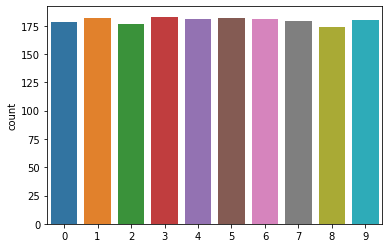

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)
print(digits.keys(), digits.target)
print(np.unique(digits.target))
sns.countplot(digits.target)

In [5]:
X = digits.data
y = digits.target == 9      # 출력 9(1-positive-양성), 9가 아니면 (0-negative-음성)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0
)

c:\Users\posky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\posky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'test')

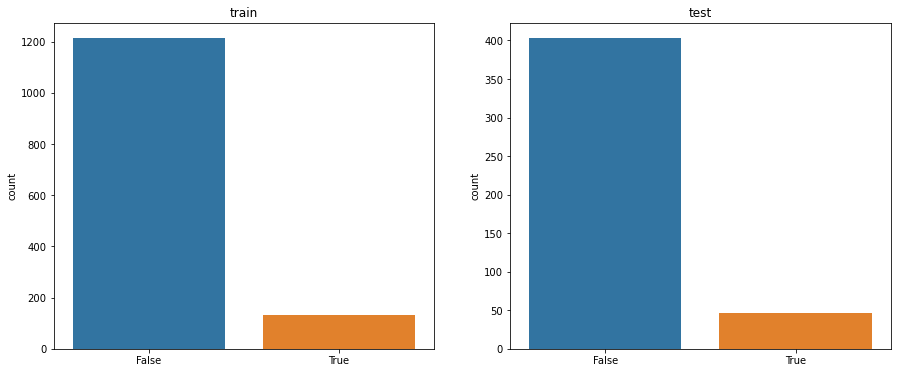

In [6]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.title('train')

plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('test')

In [7]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_model.predict(X_test)

print('pred label: {}'.format(np.unique(pred_most_frequent)))
print('test acc: {:.2f}'.format(dummy_model.score(X_test, y_test)))

pred label: [False]
test acc: 0.90


In [8]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print('pred label: {}'.format(np.unique(pred_tree)))
print('test acc: {:.2f}'.format(tree.score(X_test, y_test)))

pred label: [False  True]
test acc: 0.92


In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

logreg 점수: 0.98
오차 행렬:
[[402   1]
 [  6  41]]


c:\Users\posky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 다양한 평가지표
* 정확도 : TP + TN/(TP+FP+FN+TN) - 전체데이터중에 정확한 예측한 비율
* 정밀도(Precision) : TP/(TP+FP)
   * 예측을 Positive로 한 것중에 실제로 맞춘 것(Positive)
* 민감도(Sensitivity) or 재현율(Recall), TPRate
   * TP/(TP+FN)
   * 실제 Positive 에서 예측을 정확하게 맞춘 것의 비율
* 특이도 (Specificity)
   * 실제 음성(Negative)에서 정확하게 맞춘 것.
   * TN  / (FP + TN)
* FPRate
   * 실제 음성(Negative)에서 예측을 실패한 것.
   * FP / (FP + TN)

### F-score
* 정밀도, 재현율(민감도) 이용
* f1-score
    * 2 * (정밀도 * 재현율) / (정밀도 + 재현율)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['not 9', 'is 9']))

              precision    recall  f1-score   support

       not 9       0.90      1.00      0.94       403
        is 9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



c:\Users\posky\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)  
pred_dummy = dummy.predict(X_test)

print("예측된 레이블의 고유값: {}".format(np.unique(pred_dummy)))
print("테스트 평가 정확도 : {:.2f}".format(dummy.score(X_test, y_test)))

print(classification_report(y_test, pred_dummy,
                            target_names=["not 9", "is 9"]))

예측된 레이블의 고유값: [False  True]
테스트 평가 정확도 : 0.83
              precision    recall  f1-score   support

       not 9       0.90      0.91      0.90       403
        is 9       0.10      0.09      0.09        47

    accuracy                           0.83       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.83      0.82       450



In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print(classification_report(y_test, 
                            pred_tree,
                            target_names=["not 9", "is 9"]))

              precision    recall  f1-score   support

       not 9       0.94      0.97      0.95       403
        is 9       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred = logreg.predict(X_test)

print(classification_report(
    y_test, pred, target_names=['not 9', 'is 9']
))

print()
print(cross_val_score(logreg, X, y, scoring='f1'))

              precision    recall  f1-score   support

       not 9       0.99      1.00      0.99       403
        is 9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450


[0.76666667 0.70588235 0.90666667 0.94444444 0.82666667]


c:\Users\posky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\posky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=0).fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(
    y_test, pred, target_names=['not 9', 'is 9']
))
print()
print(cross_val_score(model, X, y, scoring='f1'))


              precision    recall  f1-score   support

       not 9       0.92      1.00      0.96       403
        is 9       1.00      0.23      0.38        47

    accuracy                           0.92       450
   macro avg       0.96      0.62      0.67       450
weighted avg       0.93      0.92      0.90       450


[0.3255814  0.24390244 0.5        0.5        0.39130435]


### 임계값과 평가지표

### 예측을 수행할 때,
* 0, 1로만 예측하는 것이 아니라,
* 1이 될 확률로 예측할 때가 있다.
* 임계값을 가지고, 0.5보다 크면 1로 예측, 0.5보다 작으면 0으로 예측.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import mglearn
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [23]:
from mglearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=(400, 50),
    centers=2,
    cluster_std=[7.0, 2],
    random_state=42
)

c:\Users\posky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [24]:
print(X.shape, y.shape)
print(X[0:5], y[0:5])

(450, 2) (450,)
[[ 9.23767508  1.24749256]
 [-2.47249173  9.34315028]
 [-3.61525291  6.02611864]
 [-0.85989572 14.41034249]
 [ 5.80773521  1.2545855 ]] [1 0 0 0 1]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

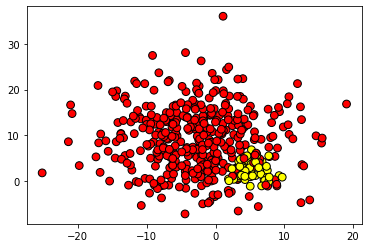

In [26]:
plt.scatter(
    X[:, 0], X[:, 1],
    c=y,
    cmap=plt.cm.autumn,
    s=60,
    edgecolors='k'
)

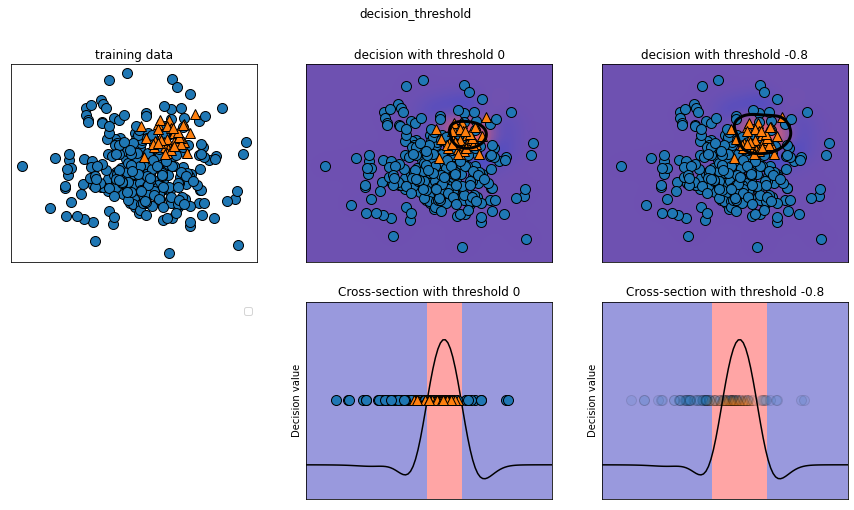

In [27]:
import mglearn
mglearn.plots.plot_decision_threshold()

In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
pred_logreg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [29]:
pred_logreg = logreg.predict_proba(X_test)
pred_logreg

array([[9.87463660e-01, 1.25363398e-02],
       [7.34557594e-01, 2.65442406e-01],
       [5.06922455e-01, 4.93077545e-01],
       [9.73828621e-01, 2.61713790e-02],
       [9.97603690e-01, 2.39631031e-03],
       [9.81662814e-01, 1.83371859e-02],
       [9.00004055e-01, 9.99959450e-02],
       [9.21321932e-01, 7.86780677e-02],
       [9.67710056e-01, 3.22899439e-02],
       [6.11277865e-01, 3.88722135e-01],
       [8.94614457e-01, 1.05385543e-01],
       [9.90699694e-01, 9.30030566e-03],
       [9.90942108e-01, 9.05789204e-03],
       [9.80424292e-01, 1.95757078e-02],
       [8.68035812e-01, 1.31964188e-01],
       [9.93497690e-01, 6.50230979e-03],
       [9.99048585e-01, 9.51414505e-04],
       [9.80076557e-01, 1.99234433e-02],
       [6.32955917e-01, 3.67044083e-01],
       [9.99962865e-01, 3.71353899e-05],
       [9.99912902e-01, 8.70982150e-05],
       [8.58474493e-01, 1.41525507e-01],
       [9.61023398e-01, 3.89766023e-02],
       [9.98342791e-01, 1.65720884e-03],
       [9.288369

In [31]:
pred_logreg[:, 0] > 0.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [32]:
pred_logreg[:, 1] > 0.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [33]:
svc = SVC(gamma=.05).fit(X_train, y_train)
pred = svc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       107
           1       0.42      0.83      0.56         6

    accuracy                           0.93       113
   macro avg       0.70      0.88      0.76       113
weighted avg       0.96      0.93      0.94       113



In [34]:
pred = svc.decision_function(X_test)
print(pred[0:10])
np.min(pred), np.max(pred)

[-1.0167542   0.72583536 -1.17766946 -1.00425497 -1.0002495  -0.99977182
 -1.07285711 -1.2206812  -1.24018502 -1.30361098]


(-1.509707253620952, 1.6245457437087478)

In [35]:
decision_0 = svc.decision_function(X_test) > 0
decision_0

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [36]:
y_pred_0 = svc.decision_function(X_test) > 0
print(classification_report(y_test, y_pred_0))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       107
           1       0.42      0.83      0.56         6

    accuracy                           0.93       113
   macro avg       0.70      0.88      0.76       113
weighted avg       0.96      0.93      0.94       113



In [37]:
decision_08 = svc.decision_function(X_test) > -0.8
decision_08

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False])

In [38]:
y_pred_08 = svc.decision_function(X_test) > -0.8
print(classification_report(y_test, y_pred_08))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       107
           1       0.33      1.00      0.50         6

    accuracy                           0.89       113
   macro avg       0.67      0.94      0.72       113
weighted avg       0.96      0.89      0.92       113



In [39]:
y_pred_8 = svc.decision_function(X_test) > 0.8
print(classification_report(y_test, y_pred_8))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.50      0.33      0.40         6

    accuracy                           0.95       113
   macro avg       0.73      0.66      0.69       113
weighted avg       0.94      0.95      0.94       113

